## Colab Setup

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
"""
Change directory to where this file is located
"""
# %cd /content/drive/MyDrive/데사원리와응용/

'\nChange directory to where this file is located\n'

## Import Modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mnist.data_utils import load_data

## K-Nearest Neighbor Implementation

In [4]:
class KNN:
    """ k-nearest neighbor classifier class """

    def train(self, X, y):
        """
        Train the classifier using the given training data (X, y).
        Recall that for k-nearest neighbors this is just memorizing the training
        data.

        Inputs:
        - X: A numpy array of shape (N, D), where N is the number of data points,
             D is the dimensionality of each data point.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i]. With C classes, each y[i] is an integer
             from 0 to C-1.
        """
        #### Question (a): your implementation starts here (don't delete this line)
        self.X_train = X
        self.y_train = y
        #### Question (a): your implementation ends here (don't delete this line)

    def inference(self, X_test, k=1, dist_metric='dot'): 
        """
        For each test example in X, this method predicts its label by majority vote
        from the k nearest training samples. It returns the predicted labels. 

        Do NOT modify this method.

        Inputs:
        - X: A numpy array of shape (N, D), where N is the number of data points,
             D is the dimensionality of each data point.
        - k: The number of neighbors to participate in voting.
        - dist_metric: Determines the distance metric to use. The default is dot-product ('dot'),
             but you will need to implement 'l2' for question (b).

        Returns:
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
             where y_pred[i] is the predicted label for the test point X[i].
        """
        # Compute the distance matrix below with the given metric.
        dists = self.compute_distance(X_test, dist_metric)
        
        # Predict the labels with the distance matrix.
        y_pred = self.predict_labels(X_test, dists, k)

        return y_pred

    def compute_distance(self, X_test, dist_metric='dot'):
        """
        Computes the distance between the training data and test data, 
        using dot-product similarity or Euclidean (L2) distance as the distance metric.

        Inputs:
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
             D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
             D is the dimensionality of each data point.
        - dist_metric: Determines the distance metric to use. The default is dot-product ('dot'),
             but you will need to implement 'l2' for question (b).
        
        Returns:
        - dists: A numpy array of shape (N, M) where N is the number of test data points, 
             and M is the number of training data points, containing distances between 
             each pair of test and train data points based on the given distance metric.
        """
        if dist_metric=='dot': 
            sim = np.matmul(X_test, self.X_train.T)
            dists = -sim
        elif dist_metric=='l2':
            #### Question (b): your implementation starts here (don't delete this line)
            # Hint: refer to the code for dot-product above
            #       and try using np.repeat and np.tile with flattened arrays.            
            N = X_test.shape[0]
            M = X_train.shape[0]
            dists = np.zeros((N, M))
            # Using formula (X - Y)^2 = X^2 + Y^2 - 2*X*Y
            X_squared = np.tile(np.sum(np.square(self.X_train), axis=1), (N, 1))
            Y_squared = np.tile(np.sum(np.square(X_test), axis=1), (M, 1))
            mul = np.dot(X_test, self.X_train.T)
            dists = np.sqrt(X_squared + Y_squared.T - 2 * mul)
            # dists = np.sqrt(np.tile(np.sum(np.square(self.X_train), axis=1), (num_test, 1)) + np.tile(np.sum(np.square(X), axis=1), (num_train, 1)).T - 2 * np.dot(X, self.X_train.T))

            #### Question (b): your implementation ends here (don't delete this line)
        else:
            raise KeyError("Distance metrics currently supported: \'l2\' and \'dot\'")
        return dists

    def predict_labels(self, X_test, dists, k):
        """
        For the given test image, this method takes a majority vote from k closest points
        to predict the class of the test image.

        Do NOT Modify this method.

        Inputs:
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
             D is the dimensionality of each data point.
        - dists: A numpy array of shape (N, M) where N is the number of test data points, 
             and M is the number of training data points, containing distances between 
             each pair of test and train data points based on the given distance metric.
        - k: The number of neighbors to participate in voting.

        Returns:
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
             where y_pred[i] is the predicted label for the test point X[i].
        """
        y_pred = np.zeros((X_test.shape[0],))
        for i in range(X_test.shape[0]):
            top_k_idx = dists[i].argsort()[:k]
            labels = self.y_train[top_k_idx]
            votes = np.zeros(10)
            for j in range(labels.shape[0]):
                votes[labels[j]] += 1
            y_pred[i] = np.argmax(votes)
        return y_pred


    def evaluate(self, y_pred, y):
        """
        Compares the predicted labels to the ground truth y, and prints the
        classification accuracy.
        
        Do NOT modify this method.

        Inputs:
        - y_pred: A numpy array of shape (N,) containing the predicted labels, where
             N is the number of test examples. With C classes, each y_pred[i] is
             an integer from 0 to C-1.
        - y: A numpy array of shape (N,) containing the ground truth labels, where
             N is the number of test examples. With C classes, each y[i] is an integer
             from 0 to C-1.
        
        Returns:
        - accuracy
        """
        y_pred = np.expand_dims(y_pred, axis=1)
        num_correct = np.sum(y_pred == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy


## Data Loading

In [5]:
def sample_data(X, y, count):
    mask = np.random.choice(X.shape[0], count, replace=False)
    X_sampled = X[mask]
    y_sampled = y[mask]
    return X_sampled, y_sampled

In [6]:
num_train_data = 20000
num_test_data = 4000

X_train_src, y_train_src, X_test_src, y_test_src = load_data(one_hot_encoding=False) # Training data is flattened when data is loaded
X_train, y_train = sample_data(X_train_src, y_train_src, num_train_data)
X_test, y_test = sample_data(X_test_src, y_test_src, num_test_data)

MNIST data loaded:
Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Test data shape: (10000, 784)
Test labels shape: (10000, 1)


## Model Training & Evaluation

In [7]:
model = KNN()
model.train(X_train, y_train)

In [8]:
"""
Model used to test the performance.
"""
K = 15
y_pred = model.inference(X_test, k=K, dist_metric='l2')
acc = model.evaluate(y_pred, y_test)
print("Accuarcy:", acc)

Accuarcy: 0.955


## Experiments

In [9]:
#### Question (c): your implementation starts here (don't delete this line)

In [10]:
# Modify the number of k's and metrics to try as you want
num_ks = 50 # number of k's
metrics = ['dot', 'l2']

In [11]:
# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k))
        y_pred = model.inference(X_test, k=k, dist_metric=metric)
        acc = model.evaluate(y_pred, y_test)
        result[metric].append(acc)
    print()

running KNN with dot distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with l2 distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50



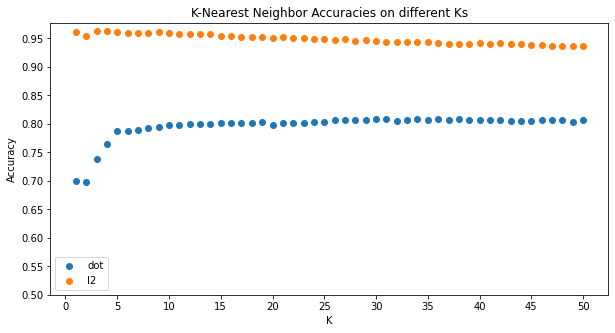

In [12]:
# Visualize and report the results
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.scatter(x_axis, result[metric], label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()

In [13]:
"""
Experiment with multiple values of k for both types of distances (dot-product similarity, L2 distance) 
in computing k nearest neighbors and compare the results. 
"""

'\nExperiment with multiple values of k for both types of distances (dot-product similarity, L2 distance) \nin computing k nearest neighbors and compare the results. \n'

## Effect of k

For both metrics, we cannot observe distinct peak as k increased if dataset is enough large. This is because the larger the dataset is, the lesser we succrently choose the outlier, makes KNN choose more appropriate data when training. Consequently, accuracy graph gets smoothed and we can say that L2 metric works well for small k (~5) and dot metric for large k (keeps increasing when k increases).
On the other hand, if dataset is small, we can observe obvious optimal k. 

In [14]:
#### Question (c): your implementation ends here (don't delete this line)